In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras as k
from keras import Sequential
from keras.layers import Conv2D, Dense, Dropout, MaxPool2D, BatchNormalization, Flatten

In [2]:
df=pd.read_csv("C:/Users/Zephyrus/Datasets/Age, gender, ethnicity/age_gender.csv")

In [3]:
age=np.array(df['age'])

In [4]:
for i in range(len(age)):
    if(age[i]<=17):
        age[i]=0
    else:
        age[i]=1        

In [5]:
df['age']=age

In [6]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,0,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,0,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,0,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,0,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,0,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [7]:
final_df=df.drop(['ethnicity', 'gender', 'img_name'], axis=1)

In [8]:
"""""
enc_age=pd.get_dummies(final_df['age'], prefix='age')
final_df=pd.concat([final_df,enc_age], axis=1)
final_df=final_df.drop('age', axis=1)

"""""

'""\nenc_age=pd.get_dummies(final_df[\'age\'], prefix=\'age\')\nfinal_df=pd.concat([final_df,enc_age], axis=1)\nfinal_df=final_df.drop(\'age\', axis=1)\n\n'

In [9]:
final_df.head()

,age,pixels
0,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [10]:
X=final_df.iloc[:,1:]
y=final_df.iloc[:,:1]

In [11]:
num_pixels = len(X['pixels'][0].split(" "))
img_height = int(np.sqrt(len(X['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(X['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)

2304 48 48


In [12]:
X = pd.Series(X['pixels'])
X = X.apply(lambda x:x.split(' '))
X = X.apply(lambda x:np.array(list(map(lambda z:np.int(z), x))))
X = np.array(X)
X = np.stack(np.array(X), axis=0)

# reshape data
X = X.reshape(-1, 48, 48, 1)
print("X shape: ", X.shape)

C:\Users\Zephyrus\AppData\Local\Temp/ipykernel_14428/639216845.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = X.apply(lambda x:np.array(list(map(lambda z:np.int(z), x))))


X shape:  (23705, 48, 48, 1)


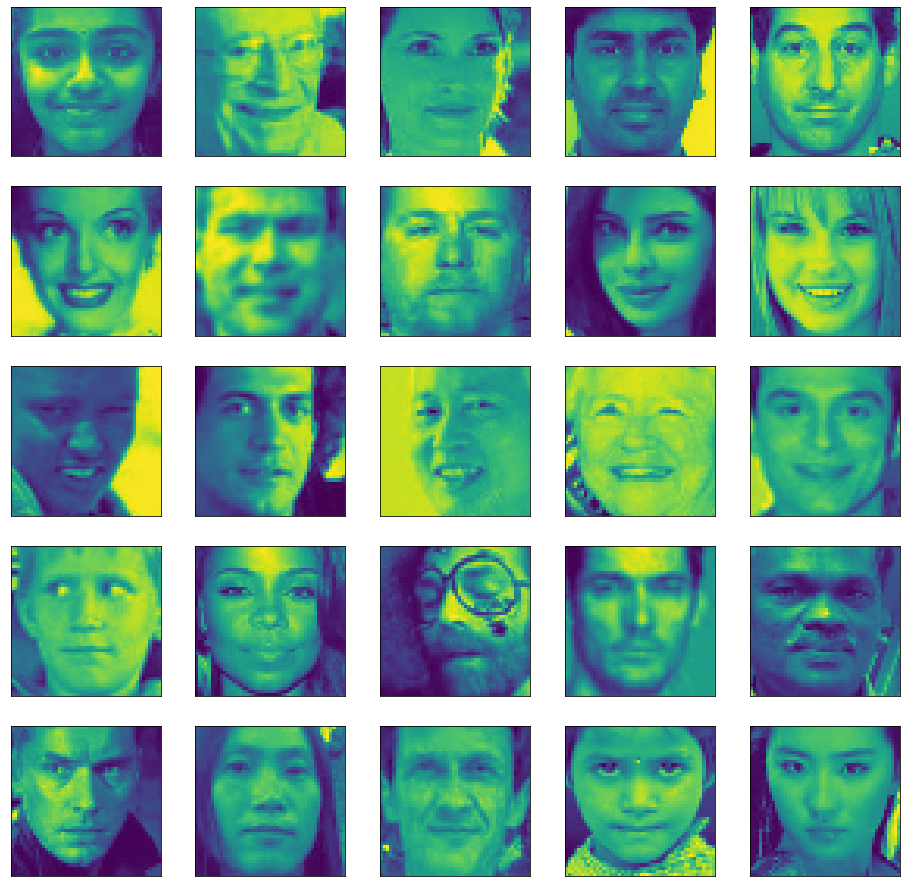

In [13]:
plt.figure(figsize=(16,16))
for i,a in zip(np.random.randint(0, 23705, 25), range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
plt.show()

In [14]:
X=X/255
X=X/255

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
       featurewise_center = False,
       samplewise_center = False,
       featurewise_std_normalization = False,
       samplewise_std_normalization=False,  
       zca_whitening=False,
       rotation_range=5, 
       zoom_range = 0.1,
       width_shift_range=0.1, 
       height_shift_range=0.1,  
       horizontal_flip=False,  
       vertical_flip=False
)

datagen.fit(X)

In [16]:
X

array([[[[1.98385236e-03],
         [1.96847366e-03],
         [1.96847366e-03],
         ...,
         [1.81468666e-03],
         [1.52249135e-03],
         [8.15071126e-04]],

        [[1.99923106e-03],
         [1.98385236e-03],
         [1.96847366e-03],
         ...,
         [1.79930796e-03],
         [1.50711265e-03],
         [7.99692426e-04]],

        [[2.01460977e-03],
         [1.98385236e-03],
         [1.99923106e-03],
         ...,
         [1.75317186e-03],
         [1.49173395e-03],
         [7.68935025e-04]],

        ...,

        [[1.86082276e-03],
         [2.12226067e-03],
         [2.26066897e-03],
         ...,
         [2.32218378e-03],
         [2.30680507e-03],
         [2.27604767e-03]],

        [[1.79930796e-03],
         [2.10688197e-03],
         [2.24529027e-03],
         ...,
         [2.29142637e-03],
         [2.27604767e-03],
         [2.27604767e-03]],

        [[1.76855056e-03],
         [2.07612457e-03],
         [2.18377547e-03],
         ...,
 

In [17]:
y

,age
0,0
1,0
2,0
3,0
4,0
...,...
23700,1
23701,1
23702,1
23703,1


In [18]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
lb=LabelEncoder()
y=to_categorical(lb.fit_transform(y))

C:\Users\Zephyrus\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [19]:
lb.classes_

array([0, 1], dtype=int64)

In [20]:
X[1].shape

(48, 48, 1)

In [21]:
"""""
from tensorflow.keras.utils import to_categorical
y["age"] = pd.cut(y["age"],bins=[0,3,18,45,64,116],labels=["0","1","2","3","4"])
age_matrix = np.array(y["age"])
age = to_categorical(age_matrix, num_classes = 5)
print(age)

"""""

'""\nfrom tensorflow.keras.utils import to_categorical\ny["age"] = pd.cut(y["age"],bins=[0,3,18,45,64,116],labels=["0","1","2","3","4"])\nage_matrix = np.array(y["age"])\nage = to_categorical(age_matrix, num_classes = 5)\nprint(age)\n\n'

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42, test_size=0.2)

In [23]:
X_train

array([[[[1.59938485e-03],
         [1.78392926e-03],
         [1.72241446e-03],
         ...,
         [2.44521338e-03],
         [2.26066897e-03],
         [2.10688197e-03]],

        [[1.55324875e-03],
         [1.58400615e-03],
         [1.79930796e-03],
         ...,
         [2.46059208e-03],
         [2.30680507e-03],
         [2.06074587e-03]],

        [[1.49173395e-03],
         [1.36870434e-03],
         [1.76855056e-03],
         ...,
         [2.44521338e-03],
         [2.24529027e-03],
         [2.01460977e-03]],

        ...,

        [[1.63014225e-03],
         [1.72241446e-03],
         [1.39946175e-03],
         ...,
         [2.01460977e-03],
         [1.58400615e-03],
         [1.09188774e-03]],

        [[1.50711265e-03],
         [1.61476355e-03],
         [1.58400615e-03],
         ...,
         [1.36870434e-03],
         [1.46097655e-03],
         [1.06113033e-03]],

        [[1.56862745e-03],
         [1.64552095e-03],
         [1.69165705e-03],
         ...,
 

In [24]:
y_test

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [25]:
ACCURACY_THRESHOLD = 0.94

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

def trainModel(model, epochs, optimizer):
    batch_size = 16
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, 
                     batch_size=batch_size, callbacks=[callback])

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [26]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), padding='same'),)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       2

In [27]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam(lr=0.001)
#model.compile(optimizer= optimizer, loss= 'categorical_crossentropy', metrics=['accuracy'])

C:\Users\Zephyrus\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [28]:
model_history=trainModel(model=model, epochs=30, optimizer=optimizer)

Epoch 1/30
1186/1186 [==============================] - 45s 37ms/step - loss: 0.2777 - accuracy: 0.9014 - val_loss: 0.3174 - val_accuracy: 0.8808
Epoch 2/30
1186/1186 [==============================] - 45s 38ms/step - loss: 0.2055 - accuracy: 0.9294 - val_loss: 0.2054 - val_accuracy: 0.9329
Epoch 3/30
1186/1186 [==============================] - 43s 36ms/step - loss: 0.1822 - accuracy: 0.9367 - val_loss: 0.2269 - val_accuracy: 0.9167
Epoch 4/30
1185/1186 [============================>.] - ETA: 0s - loss: 0.1629 - accuracy: 0.9425

Stopping training as we have reached 94.00% accuracy!
1186/1186 [==============================] - 40s 34ms/step - loss: 0.1629 - accuracy: 0.9425 - val_loss: 0.2275 - val_accuracy: 0.9475


In [29]:
#model.save('C:/Users/Zephyrus/Models/Age Recognition2/Model3.h5')

In [30]:
predictions=model.predict(X_test)

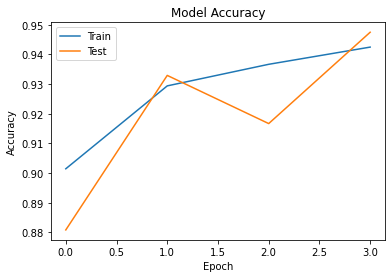

In [31]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

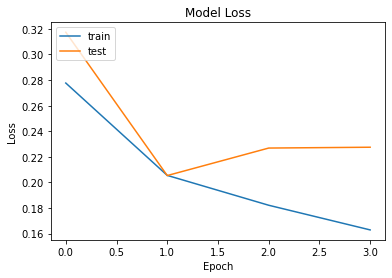

In [32]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
pred=model.predict(X_test)
pred=pred.argmax(axis=1)
pred=pred.astype(int).flatten()
pred=lb.inverse_transform(pred)
pred=pd.DataFrame({'Predicted Values':pred})

In [34]:
act=y_test.argmax(axis=1)
act=act.astype(int).flatten()
act=lb.inverse_transform(act)
act=pd.DataFrame({'Actual Values': act})

In [35]:
result_df=act.join(pred)

In [36]:
result_df[20:70]

,Actual Values,Predicted Values
20,1,1
21,1,1
22,1,1
23,1,1
24,0,0
25,1,1
26,1,1
27,0,0
28,1,1
29,1,1


In [37]:
test_pred=model.predict(X_test[1:2])

In [38]:
X_test[1].shape

(48, 48, 1)

In [39]:
test_pred=test_pred.argmax(axis=1)
test_pred=test_pred.astype(int).flatten()
test_pred=lb.inverse_transform(test_pred)

In [40]:
test_pred=pd.DataFrame(test_pred)

In [41]:
test_pred.head()

,0
0,1
